# Analyse simulations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [12]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from e_sim.utils import compute_avg_cost, agg_data, sensitivity_cost, sensitivity_plot

## Get all output files and set parameters

We need the aggregated output files of all simulations.

In [3]:
path_experiment = '../output/experiments/'

In [4]:
costs = {
    'backorder': 0.4,
    'holding': 0.02,
    'c_service': 1,
    'c_repair': 2
}

settings = {
    'demand_rate': [1],
    'repair_rate': [0.5],
    'Q_service': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Q_repair': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'S_depot': [1],
    'S_warehouse': [2],
    'init_stock_depot': [2, 4],
    'init_stock_warehouse': [2, 8]
}

In [5]:
df_agg = pd.read_csv(f'{path_experiment}sim_data_agg.csv', index_col=list(settings.keys()))
df_agg

avg_backorder  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                  
1           0.5         2         1        1       2           2                2                             0.000   
                                                                                8                             0.000   
                        1         1        1       2           4                8                             0.000   
                                                               2                8                             0.000   
                                                               4                2                             0.000   
...                                                                                                             ...   
                        9         10       1       2           4                8                             1.887   
                        10        10       1       2           2                2                             8.386   
                                                                                8                             5.446   
                                                               4                2                             6.400   
                                                                                8                             3.558   

                                                                                                      avg_stock  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse              
1           0.5         2         1        1       2           2                2                             4   
                                                                                8                            10   
                        1         1        1       2           4                8                            12   
                                                               2                8                            10   
                                                               4                2                             6   
...                                                                                                         ...   
                        9         10       1       2           4                8                            12   
                        10        10       1       2           2                2                             4   
                                                                                8                            10   
                                                               4                2                             6   
                                                                                8                            12   

                                                                                                      level_8  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse            
1           0.5         2         1        1       2           2                2                           0   
                                                                                8                           0   
                        1         1        1       2           4                8                           0   
                                                               2                8                           0   
                                                               4                2                           0   
...                                                                                                       ...   
                        9         10       1       2           4                8                           0   
                        10        10     

From this we can compute the cost components of all simulations using the specified settings.

In [6]:
df_avg_cost = df_agg.groupby(list(settings.keys())).apply(compute_avg_cost, costs)
df_avg_cost

holding_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                 
1           0.5         2         1        1       2           2                2                             0.08   
                                                                                8                             0.20   
                        1         1        1       2           4                8                             0.24   
                                                               2                8                             0.20   
                                                               4                2                             0.12   
...                                                                                                            ...   
                        9         10       1       2           4                8                             0.24   
                        10        10       1       2           2                2                             0.08   
                                                                                8                             0.20   
                                                               4                2                             0.12   
                                                                                8                             0.24   

                                                                                                      back_order_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                    
1           0.5         2         1        1       2           2                2                              0.0000   
                                                                                8                              0.0000   
                        1         1        1       2           4                8                              0.0000   
                                                               2                8                              0.0000   
                                                               4                2                              0.0000   
...                                                                                                               ...   
                        9         10       1       2           4                8                              0.7548   
                        10        10       1       2           2                2                              3.3544   
                                                                                8                              2.1784   
                                                               4                2                              2.5600   
                                                                                8                              1.4232   

                                                                                                      setup_repair_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                      
1           0.5         2         1        1       2           2                2                                 1.992   
                                                                                8                                 1.992   
                        1         1        1       2           4                8                                 1.992   
                                                               2                8                                 1.992   
                                                               4                2                                 1.992   
...                                                                                                                 ...   
         

## Plot average cost as a function of the different batch sizes

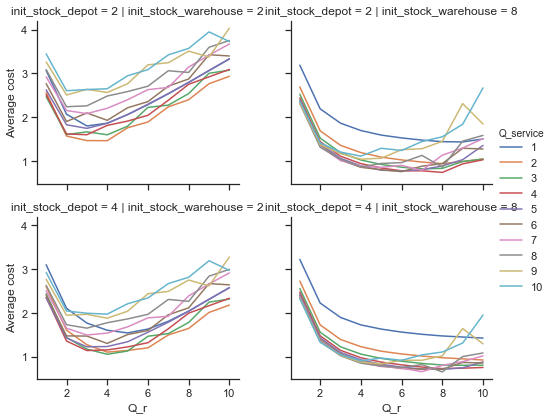

In [7]:
# Reset index variables
df_avg_cost_plot = df_avg_cost.reset_index()
df_avg_cost_plot.columns

g = sns.FacetGrid(df_avg_cost_plot, row='init_stock_depot', col='init_stock_warehouse', hue='Q_service', aspect=1.2, sharey=True)
g.map(plt.plot, 'Q_repair', 'average_cost').add_legend().set_axis_labels('Q_r', 'Average cost')

## Optimal batch size

In [8]:
# Group by all settings except batch sizes
settings_wo_batch = [setting for setting in settings.keys() if setting != 'Q_service' and setting != 'Q_repair']

df_opt_batch = df_avg_cost.loc[df_avg_cost.groupby(settings_wo_batch)['average_cost'].idxmin()]
df_opt_batch = df_opt_batch.reset_index().set_index(settings_wo_batch)

df_opt_batch

Q_service  \
demand_rate repair_rate S_depot S_warehouse init_stock_depot init_stock_warehouse              
1           0.5         1       2           2                2                             2   
                                                             8                             4   
                                            4                2                             3   
                                                             8                             8   

                                                                                   Q_repair  \
demand_rate repair_rate S_depot S_warehouse init_stock_depot init_stock_warehouse             
1           0.5         1       2           2                2                            4   
                                                             8                            8   
                                            4                2                            4   
                                                             8                            8   

                                                                                   holding_cost  \
demand_rate repair_rate S_depot S_warehouse init_stock_depot init_stock_warehouse                 
1           0.5         1       2           2                2                             0.08   
                                                             8                             0.20   
                                            4                2                             0.12   
                                                             8                             0.24   

                                                                                   back_order_cost  \
demand_rate repair_rate S_depot S_warehouse init_stock_depot init_stock_warehouse                    
1           0.5         1       2           2                2                              0.3968   
                                                             8                              0.0496   
                                            4                2                              0.1164   
                                                             8                              0.0488   

                                                                                   setup_repair_cost  \
demand_rate repair_rate S_depot S_warehouse init_stock_depot init_stock_warehouse                      
1           0.5         1       2           2                2                                 0.496   
                                                             8                                 0.248   
                                            4                2                                 0.496   
                                                             8                                 0.248   

                                                                                   setup_service_cost  \
demand_rate repair_rate S_depot S_warehouse init_stock_depot init_stock_warehouse                       
1           0.5         1       2           2                2                                  0.496   
                                                             8                                  0.248   
                                            4                2                                  0.330   
                                                             8                                  0.124   

                                                                                   average_cost  
demand_rate repair_rate S_depot S_warehouse init_stock_depot init_stock_warehouse                
1           0.5         1       2           2                2                           1.4688  
                                                             8                           0.7456  
                                            4                2                 

## Sensitivity analysis w.r.t. cost parameters

In [9]:
cost_ranges = {
    'backorder': np.linspace(0, 1),
    'holding': np.linspace(0, 1),
    'c_service': np.linspace(0, 5),
    'c_repair': np.linspace(0, 5)
}

In [10]:
df_sensitivity = df_agg.groupby(list(settings.keys())).apply(sensitivity_cost, costs, cost_ranges)
df_sensitivity.head()

/Users/markvanderbroek/anaconda3/envs/rlenv/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


average_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                   
1           0.5         1         1        1       2           2                2                    0         3.068   
                                                                                                     1         3.068   
                                                                                                     2         3.068   
                                                                                                     3         3.068   
                                                                                                     4         3.068   

                                                                                                        back_order_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                      
1           0.5         1         1        1       2           2                2                    0              0.0   
                                                                                                     1              0.0   
                                                                                                     2              0.0   
                                                                                                     3              0.0   
                                                                                                     4              0.0   

                                                                                                        setup_repair_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                        
1           0.5         1         1        1       2           2                2                    0              1.992   
                                                                                                     1              1.992   
                                                                                                     2              1.992   
                                                                                                     3              1.992   
                                                                                                     4              1.992   

                                                                                                        setup_service_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                         
1           0.5         1         1        1       2           2                2                    0               0.996   
                                                                                                     1               0.996   
                                                                                                     2               0.996   
                                                                                                     3               0.996   
                                                                                                     4               0.996   

                                                                                                         cost_par  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                
1           0.5         1         1        1       2           2                2                    0  backorder   
                                                                                                     1  backorder   
                                                                                                     2  backorder   
                                                         

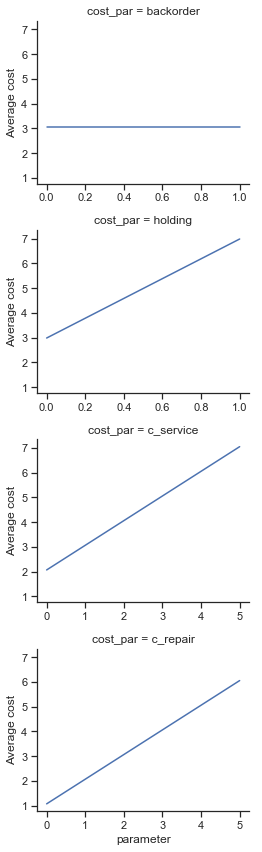

In [13]:
for cols, df in df_sensitivity.groupby(list(settings.keys())):
    sensitivity_plot(df)
    break # Otherwise we have to many plots

Right now the sensitivity analysis is not very interesting since all cost just depend on one "level". Holding cost depend on the total number of items, Back-order cost depend on the average back-order level (which is constant for one simulation instance).